In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import matplotlib.pyplot as plt
from collections import Counter

df = pd.read_csv("HepatitisCdata.csv")
df.head()


# Define feature selection methods
feature_selectors = [
    ("mutual_info", SelectKBest(mutual_info_classif, k=10)),
    ("f_classif", SelectKBest(f_classif, k=10)),
    ("chi2", SelectKBest(chi2, k=10))
]

# Aggregate selections
selected_features = []

for name, selector in feature_selectors:
    selector.fit(X, y)
    selected_indices = selector.get_support(indices=True)
    selected_features.extend(selected_indices)

# Rank features by their frequency of selection
feature_counts = Counter(selected_features)
ranked_features = sorted(feature_counts.keys(), key=lambda x: feature_counts[x], reverse=True)

# Select top features (let's say top 10)
top_features = ranked_features[:10]

# Print the selected top features
print("Top features selected:", top_features)

# Use the selected top features to train a model
X_selected = X[:, top_features]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate the model
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)
train_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
test_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print("Train AUC:", train_auc)
print("Test AUC:", test_auc)
print("Classification Report:\n", classification_report(y_test, test_pred))

# Plot ROC Curve for Test set
from sklearn.metrics import roc_curve, auc

test_fpr, test_tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
test_roc_auc = auc(test_fpr, test_tpr)

plt.figure()
plt.plot(test_fpr, test_tpr, color='green', lw=2, label='Test ROC curve (area = %0.2f)' % test_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Test')
plt.legend(loc="lower right")
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


NameError: name 'X' is not defined

In [16]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import matplotlib.pyplot as plt
from collections import Counter

In [17]:
df = pd.read_csv("HepatitisCdata.csv")
df.head()


,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [19]:
df['Category'].value_counts()

Category
0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: count, dtype: int64

In [20]:
df['ALB'].fillna(df['ALB'].mean(), inplace=True)
df['ALP'].fillna(df['ALP'].mean(), inplace=True)
df['CHOL'].fillna(df['CHOL'].mean(), inplace=True)
df['PROT'].fillna(df['PROT'].mean(), inplace=True)
df['ALT'].fillna(df['ALT'].mean(), inplace=True)
df = df.drop('Unnamed: 0', axis=1)

print(df.isnull().sum())

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64


C:\Users\DCL\AppData\Local\Temp\ipykernel_11544\601573477.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ALB'].fillna(df['ALB'].mean(), inplace=True)
C:\Users\DCL\AppData\Local\Temp\ipykernel_11544\601573477.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [21]:
df['Category'] = df['Category'].replace({'0=Blood Donor': 0, '0s=suspect Blood Donor': 0, '1=Hepatitis': 1, '2=Fibrosis': 1, '3=Cirrhosis': 1})

C:\Users\DCL\AppData\Local\Temp\ipykernel_11544\3193369793.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Category'] = df['Category'].replace({'0=Blood Donor': 0, '0s=suspect Blood Donor': 0, '1=Hepatitis': 1, '2=Fibrosis': 1, '3=Cirrhosis': 1})


In [22]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

label_encoder = LabelEncoder()
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])
df.sample(5)

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
40,0,9,1,151,119,105,66,84,192,227,36,167,120
580,1,42,0,110,3,14,216,100,143,117,66,35,141
492,0,30,0,74,339,139,72,28,279,212,36,43,106
605,1,16,0,23,293,9,242,185,5,140,80,338,78
88,0,13,1,55,299,218,102,8,275,267,50,163,111


In [23]:
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.sample(10)

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
533,0.0,0.437500,1.0,0.026455,0.978261,0.947214,0.783784,0.026738,0.275862,0.214058,0.974138,0.985994,0.070707
110,0.0,0.333333,1.0,0.301587,0.705314,0.865103,0.550676,0.438503,0.736453,0.709265,0.646552,0.170868,0.439394
376,0.0,0.312500,0.0,0.407407,0.509662,0.328446,0.155405,0.545455,0.371921,0.412141,0.284483,0.450980,0.191919
369,0.0,0.291667,0.0,0.592593,0.118357,0.234604,0.287162,0.417112,0.396552,0.827476,0.672414,0.089636,0.565657
195,0.0,0.500000,1.0,0.761905,0.480676,0.331378,0.290541,0.748663,0.504926,0.603834,0.715517,0.103641,0.742424
305,0.0,0.833333,1.0,0.116402,0.338164,0.351906,0.408784,0.401070,0.687192,0.846645,0.672414,0.394958,0.560606
327,0.0,0.145833,0.0,0.322751,0.285024,0.272727,0.209459,0.278075,0.576355,0.594249,0.353448,0.532213,0.252525
550,1.0,0.187500,1.0,0.783069,0.072464,0.170088,0.793919,0.326203,0.825123,0.172524,0.379310,0.781513,0.707071
318,0.0,0.125000,0.0,0.412698,0.050725,0.401760,0.489865,0.235294,0.482759,0.233227,0.215517,0.000000,0.530303
449,0.0,0.500000,0.0,0.412698,0.724638,0.451613,0.263514,0.176471,0.667488,0.926518,0.637931,0.268908,0.459596


In [24]:
np.abs(df.iloc[:,:-1].corrwith(df['Category'])).sort_values(ascending = False)

Category    1.000000
AST         0.597019
GGT         0.447204
BIL         0.433570
CHOL        0.274088
ALP         0.167298
CHE         0.166639
ALB         0.163214
CREA        0.104584
ALT         0.083090
Sex         0.071663
Age         0.044767
dtype: float64

In [25]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.model_selection import KFold, ShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
# Assuming df is your dataframe and 'readmitted' is the column to be predicted
X = df.drop('Category', axis=1)
y = df['Category']


In [28]:
# Define feature selection methods
feature_selectors = [
    ("mutual_info", SelectKBest(mutual_info_classif, k=10)),
    ("f_classif", SelectKBest(f_classif, k=10)),
    ("chi2", SelectKBest(chi2, k=10))
]


C:\Users\DCL\AppData\Local\Temp\ipykernel_11544\3368857595.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ALB'].fillna(df['ALB'].mean(), inplace=True)
C:\Users\DCL\AppData\Local\Temp\ipykernel_11544\3368857595.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

Top features selected: [2, 3, 4, 5, 6, 7, 8, 10, 11, 9]
Train Accuracy: 1.0
Test Accuracy: 0.8617886178861789
Train AUC: 1.0
Test AUC: 0.9542989953516269
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.93        96
           1       0.00      0.00      0.00         3
           2       1.00      0.22      0.36         9
           3       0.50      0.33      0.40         6
           4       1.00      0.67      0.80         9

    accuracy                           0.86       123
   macro avg       0.67      0.44      0.50       123
weighted avg       0.85      0.86      0.83       123



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


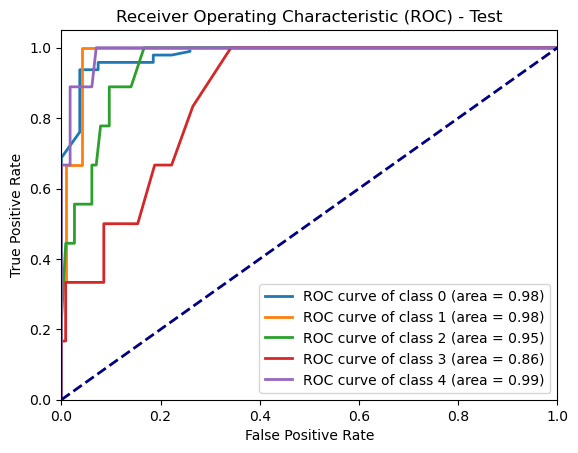

In [35]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import LabelEncoder

# Read the dataset
df = pd.read_csv("HepatitisCdata.csv")

# Fill missing values with the mean
df['ALB'].fillna(df['ALB'].mean(), inplace=True)
df['ALP'].fillna(df['ALP'].mean(), inplace=True)
df['CHOL'].fillna(df['CHOL'].mean(), inplace=True)
df['PROT'].fillna(df['PROT'].mean(), inplace=True)
df['ALT'].fillna(df['ALT'].mean(), inplace=True)

# Drop unnecessary column
df = df.drop('Unnamed: 0', axis=1)

# Encode categorical features
label_encoder = LabelEncoder()
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])

# Split into features and target
X = df.drop('Category', axis=1)
y = df['Category']

# Define feature selection methods
feature_selectors = [
    ("mutual_info", SelectKBest(mutual_info_classif, k=10)),
    ("f_classif", SelectKBest(f_classif, k=10)),
    ("chi2", SelectKBest(chi2, k=10))
]

# Aggregate selections
selected_features = []

for name, selector in feature_selectors:
    selector.fit(X, y)
    selected_indices = selector.get_support(indices=True)
    selected_features.extend(selected_indices)

# Rank features by their frequency of selection
feature_counts = Counter(selected_features)
ranked_features = sorted(feature_counts.keys(), key=lambda x: feature_counts[x], reverse=True)

# Select top features (let's say top 10)
top_features = ranked_features[:10]

# Print the selected top features
print("Top features selected:", top_features)

# Use the selected top features to train a model
X_selected = X.iloc[:, top_features].values  # Ensure we convert the DataFrame slice to a NumPy array

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate the model
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

# Adjust for multi-class AUC scoring
train_auc = roc_auc_score(y_train, model.predict_proba(X_train), multi_class='ovr')
test_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print("Train AUC:", train_auc)
print("Test AUC:", test_auc)
print("Classification Report:\n", classification_report(y_test, test_pred))

# Plot ROC Curve for Test set
from sklearn.metrics import roc_curve, auc

# For multi-class, compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(np.unique(y))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, model.predict_proba(X_test)[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Test')
plt.legend(loc="lower right")
plt.show()


C:\Users\DCL\AppData\Local\Temp\ipykernel_11544\243663131.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ALB'].fillna(df['ALB'].mean(), inplace=True)
C:\Users\DCL\AppData\Local\Temp\ipykernel_11544\243663131.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

Feature counts:
Feature 2: selected 3 times
Feature 3: selected 3 times
Feature 4: selected 3 times
Feature 5: selected 3 times
Feature 6: selected 3 times
Feature 7: selected 3 times
Feature 8: selected 3 times
Feature 9: selected 2 times
Feature 10: selected 3 times
Feature 11: selected 3 times
Feature 0: selected 1 times
Top features selected: [2, 3, 4, 5, 6, 7, 8, 10, 11, 9]
Train Accuracy: 1.0
Test Accuracy: 0.8780487804878049
Train AUC: 1.0
Test AUC: 0.9571559329234768
Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93        96
           1       0.00      0.00      0.00         3
           2       1.00      0.33      0.50         9
           3       0.67      0.33      0.44         6
           4       1.00      0.78      0.88         9

    accuracy                           0.88       123
   macro avg       0.71      0.49      0.55       123
weighted avg       0.86      0.88      0.85       123



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


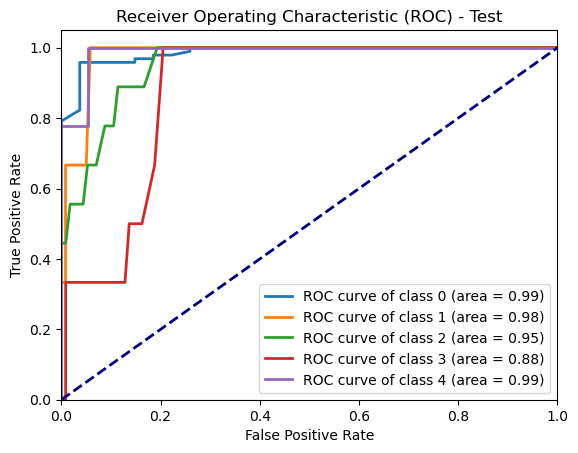

In [37]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import LabelEncoder

# Read the dataset
df = pd.read_csv("HepatitisCdata.csv")

# Fill missing values with the mean
df['ALB'].fillna(df['ALB'].mean(), inplace=True)
df['ALP'].fillna(df['ALP'].mean(), inplace=True)
df['CHOL'].fillna(df['CHOL'].mean(), inplace=True)
df['PROT'].fillna(df['PROT'].mean(), inplace=True)
df['ALT'].fillna(df['ALT'].mean(), inplace=True)

# Drop unnecessary column
df = df.drop('Unnamed: 0', axis=1)

# Encode categorical features
label_encoder = LabelEncoder()
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])

# Split into features and target
X = df.drop('Category', axis=1)
y = df['Category']

# Define feature selection methods
feature_selectors = [
    ("mutual_info", SelectKBest(mutual_info_classif, k=10)),
    ("f_classif", SelectKBest(f_classif, k=10)),
    ("chi2", SelectKBest(chi2, k=10))
]

# Aggregate selections
selected_features = []

for name, selector in feature_selectors:
    selector.fit(X, y)
    selected_indices = selector.get_support(indices=True)
    selected_features.extend(selected_indices)

# Rank features by their frequency of selection
feature_counts = Counter(selected_features)
ranked_features = sorted(feature_counts.keys(), key=lambda x: feature_counts[x], reverse=True)

# Print feature counts
print("Feature counts:")
for feature, count in feature_counts.items():
    print(f"Feature {feature}: selected {count} times")

# Select top features (let's say top 10)
top_features = ranked_features[:10]

# Print the selected top features
print("Top features selected:", top_features)

# Use the selected top features to train a model
X_selected = X.iloc[:, top_features].values  # Ensure we convert the DataFrame slice to a NumPy array

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate the model
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

# Adjust for multi-class AUC scoring
train_auc = roc_auc_score(y_train, model.predict_proba(X_train), multi_class='ovr')
test_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print("Train AUC:", train_auc)
print("Test AUC:", test_auc)
print("Classification Report:\n", classification_report(y_test, test_pred))

# Plot ROC Curve for Test set
from sklearn.metrics import roc_curve, auc

# For multi-class, compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(np.unique(y))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, model.predict_proba(X_test)[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Test')
plt.legend(loc="lower right")
plt.show()


C:\Users\DCL\AppData\Local\Temp\ipykernel_11544\1332164490.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ALB'].fillna(df['ALB'].mean(), inplace=True)
C:\Users\DCL\AppData\Local\Temp\ipykernel_11544\1332164490.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

Feature counts:
Feature ALB: selected 3 times
Feature ALP: selected 3 times
Feature ALT: selected 3 times
Feature AST: selected 3 times
Feature BIL: selected 3 times
Feature CHE: selected 3 times
Feature CHOL: selected 3 times
Feature CREA: selected 2 times
Feature GGT: selected 3 times
Feature PROT: selected 3 times
Feature Age: selected 1 times
Top features selected: ['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'GGT', 'PROT', 'CREA']
Train Accuracy: 1.0
Test Accuracy: 0.8780487804878049
Train AUC: 1.0
Test AUC: 0.9557464574898784
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94        96
           1       1.00      0.33      0.50         3
           2       1.00      0.22      0.36         9
           3       0.67      0.33      0.44         6
           4       0.88      0.78      0.82         9

    accuracy                           0.88       123
   macro avg       0.88      0.53      0.61       12

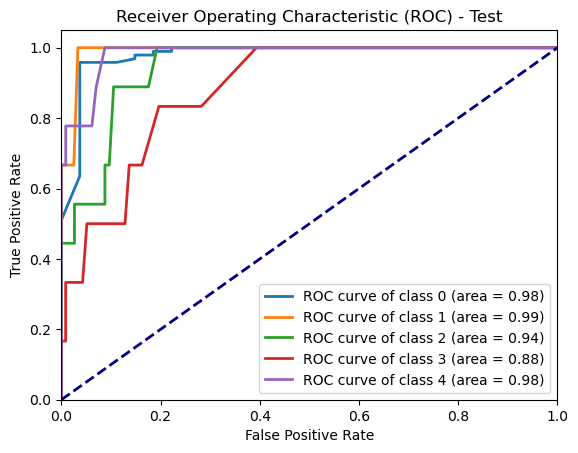

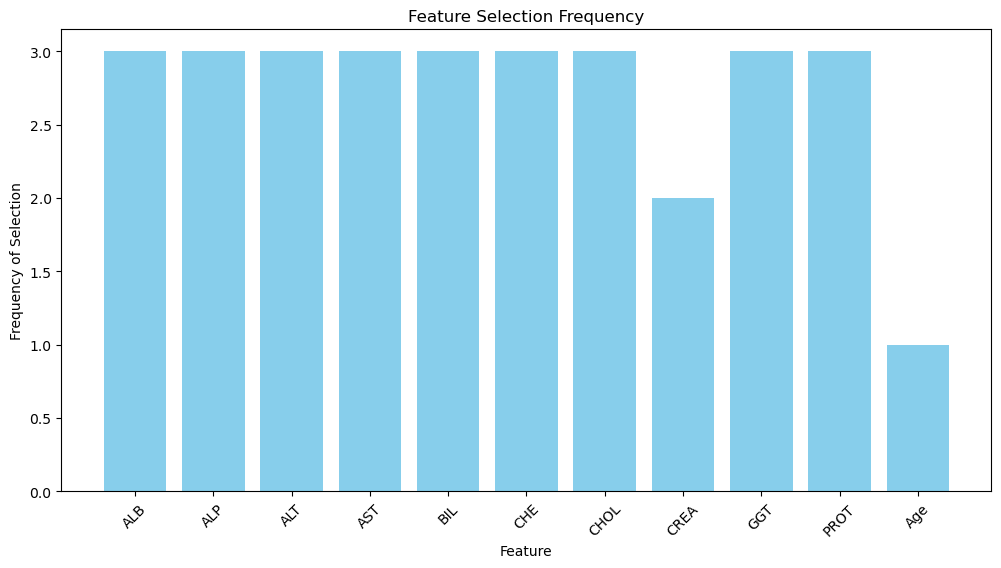

In [41]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import LabelEncoder

# Read the dataset
df = pd.read_csv("HepatitisCdata.csv")

# Fill missing values with the mean
df['ALB'].fillna(df['ALB'].mean(), inplace=True)
df['ALP'].fillna(df['ALP'].mean(), inplace=True)
df['CHOL'].fillna(df['CHOL'].mean(), inplace=True)
df['PROT'].fillna(df['PROT'].mean(), inplace=True)
df['ALT'].fillna(df['ALT'].mean(), inplace=True)

# Drop unnecessary column
df = df.drop('Unnamed: 0', axis=1)

# Encode categorical features
label_encoder = LabelEncoder()
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])

# Split into features and target
X = df.drop('Category', axis=1)
y = df['Category']

# Define feature selection methods
feature_selectors = [
    ("mutual_info", SelectKBest(mutual_info_classif, k=10)),
    ("f_classif", SelectKBest(f_classif, k=10)),
    ("chi2", SelectKBest(chi2, k=10))
]

# Aggregate selections
selected_features = []

for name, selector in feature_selectors:
    selector.fit(X, y)
    selected_indices = selector.get_support(indices=True)
    selected_features.extend(selected_indices)

# Rank features by their frequency of selection
feature_counts = Counter(selected_features)
ranked_features = sorted(feature_counts.keys(), key=lambda x: feature_counts[x], reverse=True)

# Map feature indices to names
feature_names = X.columns
ranked_feature_names = [feature_names[i] for i in ranked_features]

# Print feature counts with names
print("Feature counts:")
for feature, count in feature_counts.items():
    print(f"Feature {feature_names[feature]}: selected {count} times")

# Select top features (let's say top 10)
top_features = ranked_features[:10]
top_feature_names = [feature_names[i] for i in top_features]

# Print the selected top features
print("Top features selected:", top_feature_names)

# Use the selected top features to train a model
X_selected = X[top_feature_names].values  # Ensure we convert the DataFrame slice to a NumPy array

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate the model
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

# Adjust for multi-class AUC scoring
train_auc = roc_auc_score(y_train, model.predict_proba(X_train), multi_class='ovr')
test_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print("Train AUC:", train_auc)
print("Test AUC:", test_auc)
print("Classification Report:\n", classification_report(y_test, test_pred))

# Plot ROC Curve for Test set
from sklearn.metrics import roc_curve, auc

# For multi-class, compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(np.unique(y))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, model.predict_proba(X_test)[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Test')
plt.legend(loc="lower right")
plt.show()

# Create a bar chart for feature selection frequency
feature_labels = [feature_names[i] for i in feature_counts.keys()]
feature_selection_counts = [feature_counts[i] for i in feature_counts.keys()]

plt.figure(figsize=(12, 6))
plt.bar(feature_labels, feature_selection_counts, color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Frequency of Selection')
plt.title('Feature Selection Frequency')
plt.xticks(rotation=45)
plt.show()


In [14]:
# x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 0, stratify=y)
# print(x_train.shape, y_train.shape)
# print(x_test.shape, y_test.shape)

(492, 12) (492,)
(123, 12) (123,)
